<font> Imports for this code </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import math
from IPython.display import HTML, display
%matplotlib inline

<font>Functions for the project are in the sections below.</font>

In [2]:
def taxifileReader(filename,sortCol,startDate,endDate):
    '''
    Reads in the taxi cab csv files into dataframes. Will also convert dates into pandas
    datetime objects and sorts the data on a given column.
    '''
    temp = pd.read_csv(filename)
    temp[startDate]=pd.to_datetime(temp[startDate],format='%d%b%y:%X')
    temp[endDate]=pd.to_datetime(temp[endDate],format='%d%b%y:%X')
    temp = temp.sort_values(sortCol)
    return temp

<font> CSV Imports using functions defined above</font>

In [3]:
NWCab = taxifileReader('N&W Cab Co.csv','trip_start','trip_start','trip_end')
BennyJona = taxifileReader('Benny Jona.csv','trip_start','trip_start','trip_end')
CDCab=taxifileReader('C&D Cab Inc.csv','trip_start','trip_start','trip_end')
Zeymane=taxifileReader('Zeymane Corp.csv','trip_start','trip_start','trip_end')


In [4]:
NWCab.dropoff_community_area.value_counts()

8.0     8371
32.0    3409
28.0    2657
7.0     2393
6.0     2180
24.0    1497
33.0     561
22.0     480
3.0      432
5.0      318
77.0     196
4.0      170
16.0     113
76.0      91
1.0       75
21.0      74
14.0      68
31.0      54
41.0      46
35.0      38
60.0      29
34.0      28
56.0      26
2.0       24
59.0      23
23.0      22
15.0      21
39.0      17
13.0      12
10.0       8
30.0       8
11.0       8
9.0        7
12.0       7
38.0       7
19.0       7
27.0       6
29.0       6
42.0       6
25.0       4
58.0       4
20.0       4
17.0       3
43.0       3
61.0       2
63.0       2
36.0       2
57.0       1
26.0       1
72.0       1
69.0       1
Name: dropoff_community_area, dtype: int64

In [5]:
NWCab1 = NWCab[(pd.DatetimeIndex(NWCab['trip_start']).year == 2017) & (NWCab.trip_start.notnull()) 
               & (NWCab.trip_miles.notnull()) & (NWCab.trip_sec.notnull()) & (NWCab.fare.notnull())
               & (NWCab.trip_miles != 0) & (NWCab.fare != 0)]
NWCab1 = NWCab1[['trip_miles', 'trip_sec', 'fare']] 
NWCab1.head()

,trip_miles,trip_sec,fare
12376,6.0,1620.0,19.75
14816,1.1,300.0,6.00
12648,3.5,660.0,12.00
12910,7.5,840.0,21.00
12012,1.0,240.0,5.75


In [6]:
testNWCab = NWCab[(pd.DatetimeIndex(NWCab['trip_start']).year != 2017) & (NWCab.trip_start.notnull()) 
                  & (NWCab.trip_miles.notnull()) & (NWCab.trip_sec.notnull()) & (NWCab.fare.notnull()) 
                  & (NWCab.trip_miles != 0) & (NWCab.fare != 0)]
testNWCab = testNWCab[['trip_miles', 'trip_sec', 'fare']]
testNWCab.head()

,trip_miles,trip_sec,fare
19426,17.8,1800.0,36.25
19743,3.5,900.0,11.05
17933,0.5,180.0,4.65
17479,0.7,240.0,5.05
19402,17.5,2280.0,36.25


In [7]:
#Linear model for total time, trip distance to predict fare. 
miles = NWCab1.trip_miles.values.reshape(-1,1)
time = NWCab1.trip_sec.values.reshape(-1,1)
total = NWCab1.fare.values.reshape(-1,1)
testmiles = testNWCab.trip_miles.values.reshape(-1,1)
testtime = testNWCab.trip_sec.values.reshape(-1,1)
testtotal = testNWCab.fare.values.reshape(-1,1)

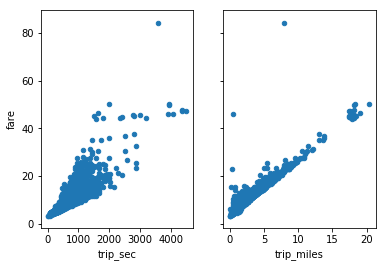

In [8]:
fig, ax = plt.subplots(ncols=2, sharey=True)

NWCab1.plot(kind='scatter', x='trip_sec', y='fare', ax=ax[0])
NWCab1.plot(kind='scatter', x='trip_miles', y='fare', ax=ax[1])

In [9]:
NWCab1.corr()

,trip_miles,trip_sec,fare
trip_miles,1.000000,0.770280,0.952395
trip_sec,0.770280,1.000000,0.873648
fare,0.952395,0.873648,1.000000


In [10]:
import numpy as np
from sklearn import linear_model

print('Regression Results', '\n')

miles_total = linear_model.LinearRegression()
miles_total.fit(miles, total);
print('Trip Miles vs. Total Cost')
print('Score:', miles_total.score(miles, total))
pred = miles_total.predict(miles)
print('RMSE:',np.sqrt(((total-pred)**2).sum()/len(pred)),'\n')

time_total = linear_model.LinearRegression()
time_total.fit(time, total);
print('Trip Time (s.)  vs. Total Cost')
print('Score',time_total.score(time, total))
pred = time_total.predict(time)
print('RMSE:',np.sqrt(((total-pred)**2).sum()/len(pred)), '\n')

('Regression Results', '\n')
Trip Miles vs. Total Cost
('Score:', 0.9070557944851529)
('RMSE:', 1.7090790920747758, '\n')
Trip Time (s.)  vs. Total Cost
('Score', 0.7632605890825609)
('RMSE:', 2.727635178181673, '\n')


In [11]:
predt = miles_total.predict(testmiles)
predt1 = time_total.predict(testtime)
print('RMSE for test data\n','Trip Miles',np.sqrt(((testtotal-predt)**2).sum()/len(predt)))
print('','Trip Time (s.)',np.sqrt(((testtotal-predt1)**2).sum()/len(predt1)))

('RMSE for test data\n', 'Trip Miles', 1.812146804774787)
('', 'Trip Time (s.)', 2.4043084978891893)


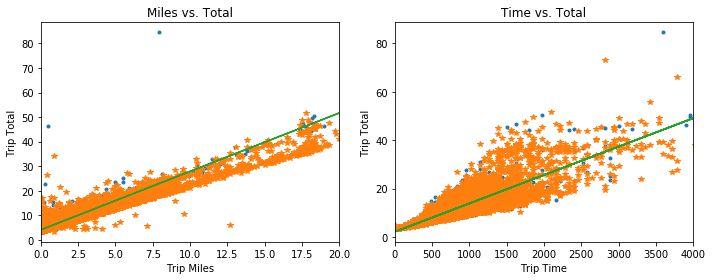

In [12]:
L = miles_total.predict(miles)
L1 = time_total.predict(time)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

ax1.plot(miles,total,'.')
ax1.plot(testmiles,testtotal,'*')
ax1.plot(miles,L)
ax1.set_xlim(xmin=0,xmax=20)
ax1.set_xlabel('Trip Miles')
ax1.set_ylabel('Trip Total')
ax1.set_title('Miles vs. Total')

ax2.plot(time,total,'.')
ax2.plot(testtime,testtotal,'*')
ax2.plot(time,L1)
ax2.set_xlim(xmin=0,xmax=4000)
ax2.set_xlabel('Trip Time')
ax2.set_ylabel('Trip Total')
ax2.set_title('Time vs. Total')

fig.tight_layout()

In [13]:
print('Trip Miles and Time to predict Total','\n')

mtTotal = linear_model.LinearRegression()
mt = np.hstack((miles,time))
mtTotal.fit(mt,total)
pred = mtTotal.predict(mt)
print('Miles/Time','\n','Score:',mtTotal.score(mt,total),'\n','RMSE:', np.sqrt(((total-pred)**2).sum()/len(pred)),'\n')

('Trip Miles and Time to predict Total', '\n')
('Miles/Time', '\n', 'Score:', 0.9552778657860572, '\n', 'RMSE:', 1.1855292180595003, '\n')


In [14]:
testmt = np.hstack((testmiles,testtime))

In [15]:
print('(Test Data: 2017) Trip Miles and Time to predict Total','\n')

pred1 = mtTotal.predict(testmt)
print('Miles/Time','\n','Score:',mtTotal.score(testmt,testtotal),'\n','RMSE:', np.sqrt(((testtotal-pred1)**2).sum()/len(pred1)),'\n')

('(Test Data: 2017) Trip Miles and Time to predict Total', '\n')
('Miles/Time', '\n', 'Score:', 0.9298156154324633, '\n', 'RMSE:', 1.3568539228542837, '\n')
